In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.distributions as td

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
y = tf.placeholder(shape=(500, 10), dtype=tf.float64, name='y')
W1 = tf.get_variable('W1', [10, 1], np.float64)
W2 = tf.get_variable('W2', [1, 10], np.float64)

In [5]:
pred_mu = tf.reshape(tf.matmul(y, W1), (1, 500))
pred = tf.matmul(tf.matmul(y, W1), W2)

In [6]:
F = tf.placeholder(shape=(500), dtype=tf.float64, name='F')
cov = tf.placeholder(shape=(500, 500), dtype=tf.float64, name='cov')

In [7]:
dist = td.MultivariateNormalFullCovariance(loc=np.zeros(500), covariance_matrix=cov)
log_prob = dist.log_prob(pred_mu)
loss = tf.reduce_mean((y - pred) ** 2)

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The T

In [9]:
gradients = tf.gradients(log_prob + loss, [W1, W2])

Instructions for updating:
Use tf.cast instead.


In [10]:
x = np.linspace(0, 500, 500)

In [11]:
latent = np.zeros((500, 1))
latent[:, 0] = np.sin(x / 100)
#latent[:, 1] = np.sin(x * 5 + 1)

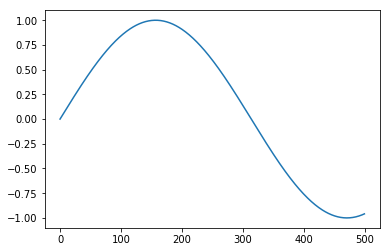

In [12]:
plt.plot(latent[:, 0])
#plt.plot(latent[:, 1])
plt.show()

In [13]:
loading = np.random.normal(0, 1, [1, 10])

In [14]:
observation = np.dot(latent, loading) + np.random.normal(0, 0.1, [500, 10])

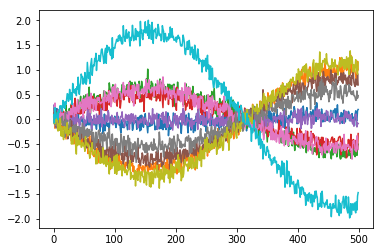

In [15]:
for j in range(10):
    plt.plot(observation[:, j])
plt.show()

In [16]:
def kernel_covariance(x, l, s, noise=1e-6):
    """
    Covariance matrix with squared exponential kernel
    """
    t = x.shape[0]
    cov_sample = np.zeros((t, t))
    for i in range(t):
        for j in range(t):
            cov_sample[i, j] = s ** 2 * np.exp(-(x[i] - x[j]) ** 2 / (2 * l ** 2))
    cov_sample += np.eye(t) * noise  # add noise for numerical stability
    return cov_sample

In [29]:
covariance = kernel_covariance(x, 100.0, 1.0, 0.1)

feed_dict = {y: observation, 
             F: latent[:, 0], 
             cov: covariance}

In [30]:
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss - log_prob)

[-55.27244174]
0.78872753762939


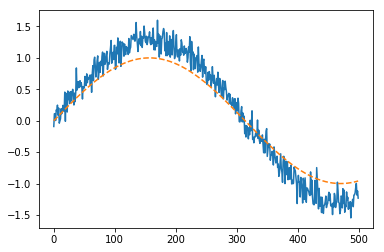

[-50.48279068]
0.433701291309101


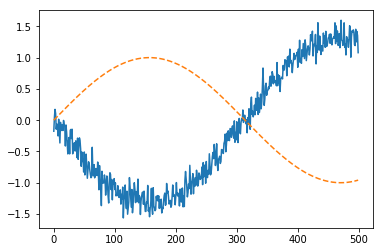

[-57.36543181]
0.3403359594251109


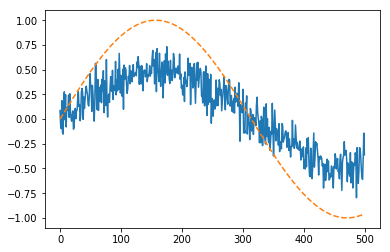

[-60.28253689]
0.40505659440808384


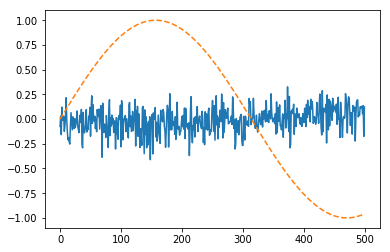

[-43.53539494]
0.2572827533561066


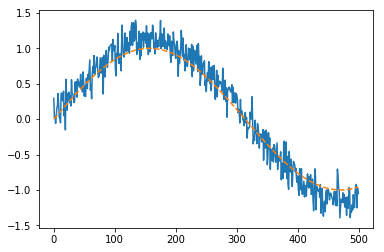

[-56.63623425]
0.40010028813402515


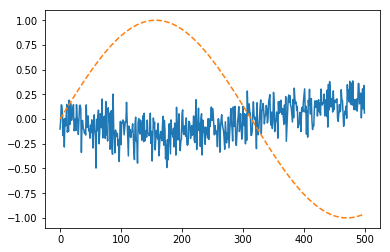

[-36.48832207]
0.4285289714971907


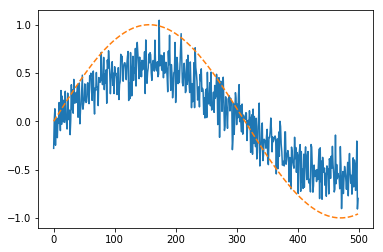

[-48.26568622]
0.6727602846099034


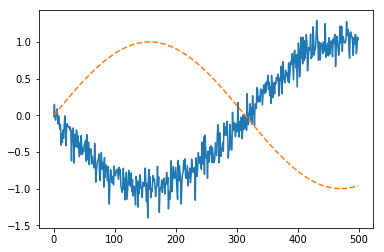

[-63.47749381]
0.9259667353961882


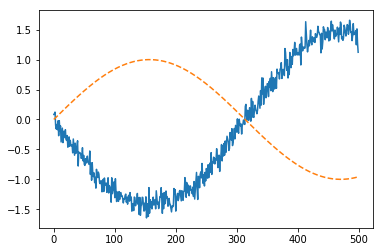

[-60.06167176]
0.45970570652381465


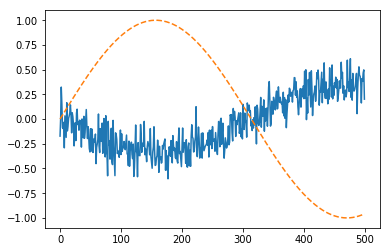

[-45.98898572]
0.4915742222967201


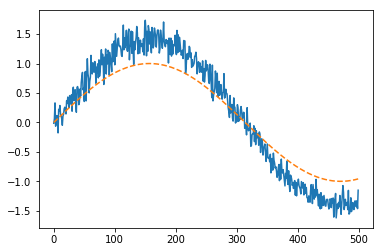

[-54.47991278]
0.47454988343080695


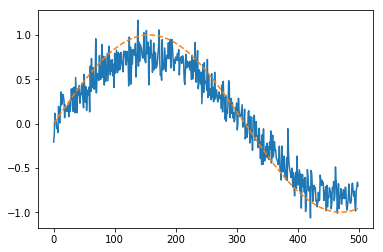

[-46.43864859]
0.70994139780495


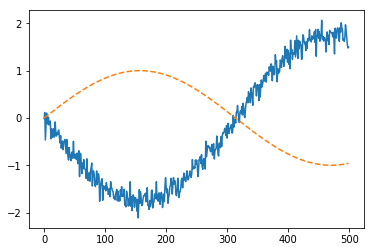

[-62.18482548]
0.5323386202193003


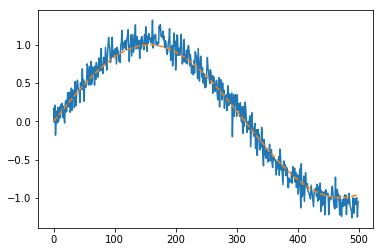

[-63.87375856]
0.35189462008506955


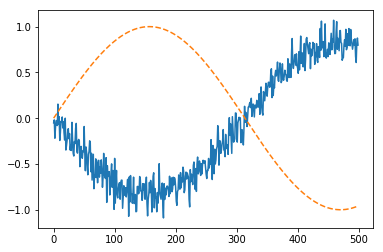

[-47.96952156]
0.4098623425424026


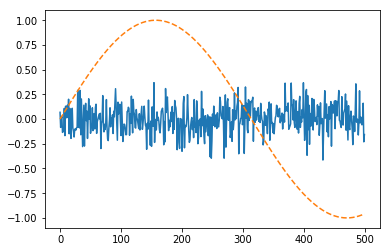

[-27.97073091]
1.1059201179103588


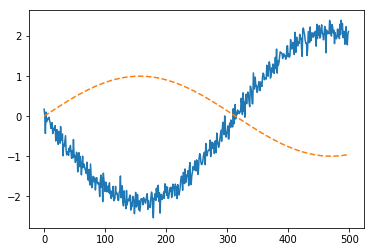

[-79.71220008]
0.5572408331558097


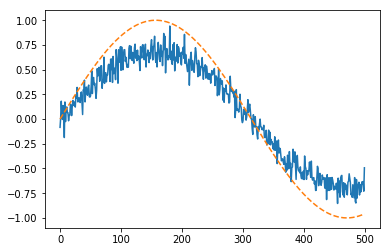

[-35.67722317]
0.3074876411608525


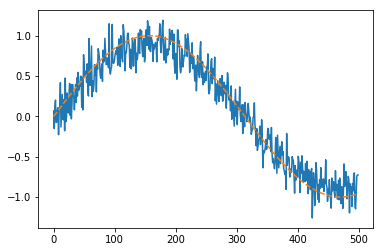

[-37.20484582]
0.47064521268031595


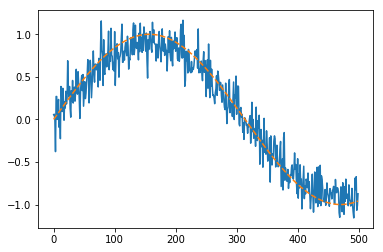

[-52.54355158]
0.37788661921254724


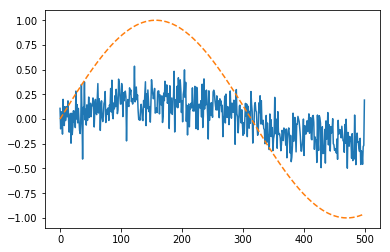

[-34.3393248]
0.5584130506724585


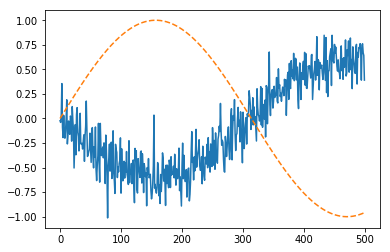

[-52.85283144]
0.3972999784118856


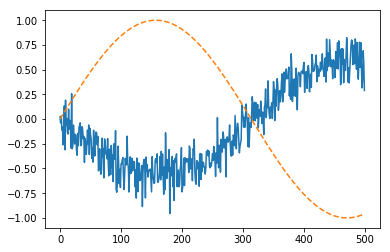

[-47.76168558]
0.42808617142031874


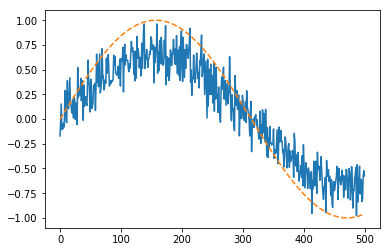

[-31.39336962]
0.455520985012217


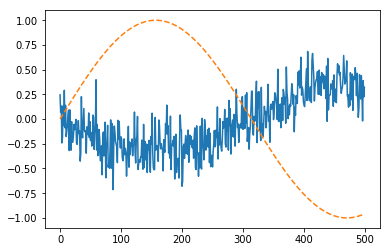

[-27.45139719]
0.43724265848560734


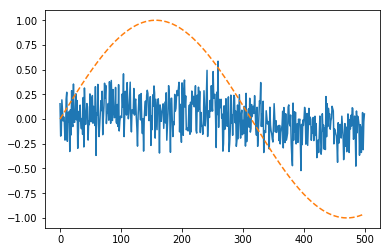

[-54.02681187]
0.47096981376413444


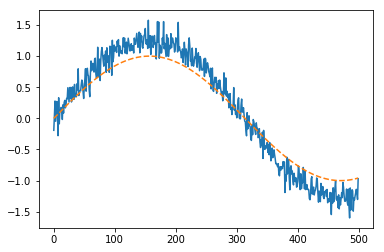

[-58.56949636]
0.440783492813751


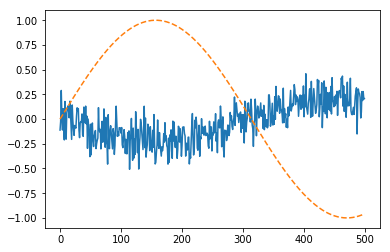

[-53.51896907]
0.47454296187494194


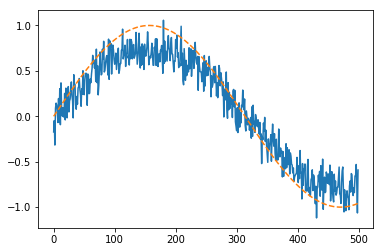

[-69.3086704]
0.4205950352533171


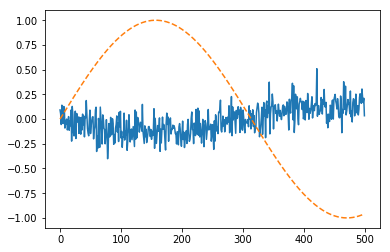

[-40.15100974]
0.3839749675230705


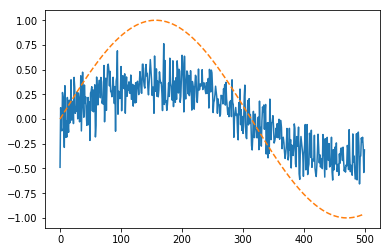

[-51.66357755]
0.41228510769918086


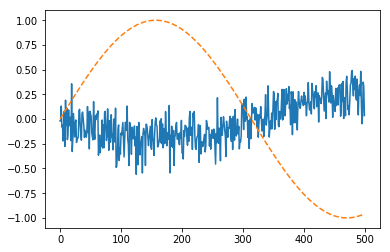

[-37.16197885]
0.6739349515674213


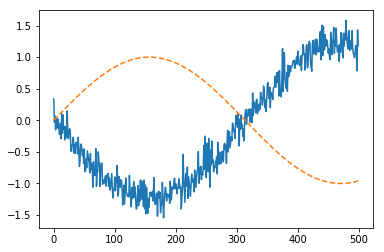

[-23.76637404]
0.39990764015662356


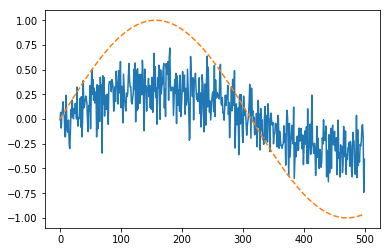

[-49.0181517]
0.38789389257850604


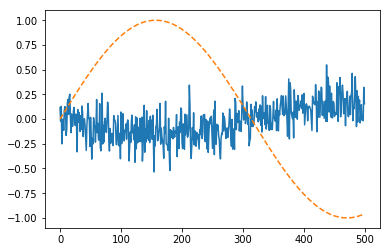

[-54.92581508]
0.3759923793209332


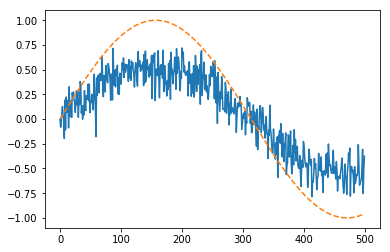

[-78.2514392]
0.26236395979384936


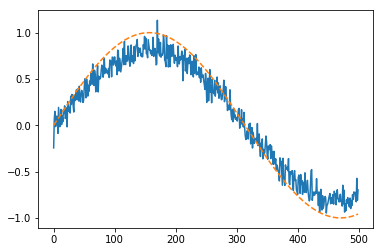

[-47.353256]
0.8933406900373011


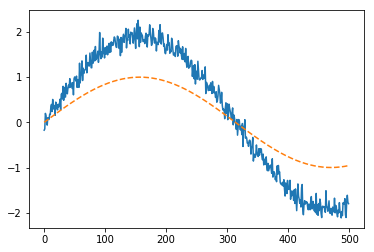

[-56.22614821]
0.4810042495844638


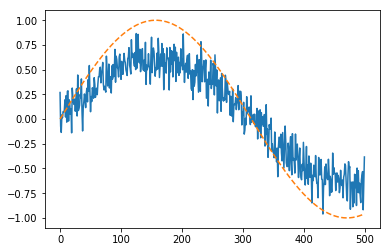

[-36.34561889]
0.4521863869269337


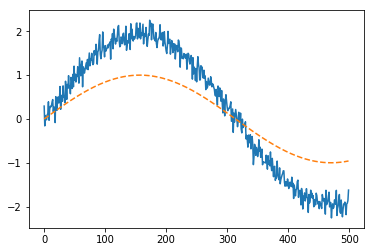

[-48.56708357]
0.4208705794012182


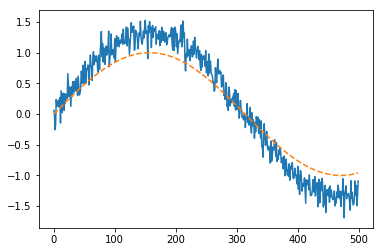

[-54.71880068]
0.39451764309440107


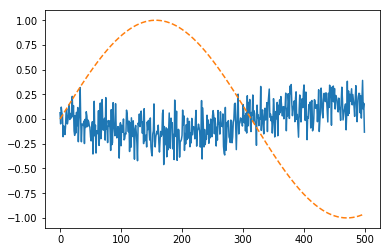

[-59.60094998]
0.42544545891798946


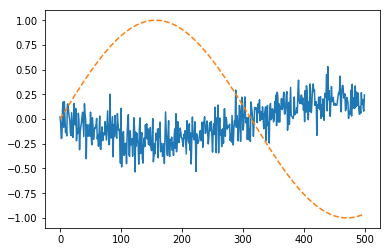

[-61.09165623]
0.7123822631039


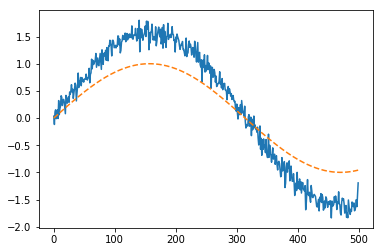

[-51.11054249]
0.42061700431958504


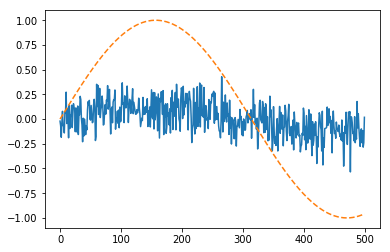

[-58.24358412]
0.4479411232152497


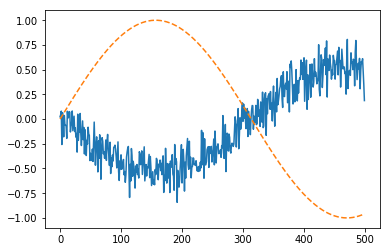

[-50.15630865]
0.524265322938639


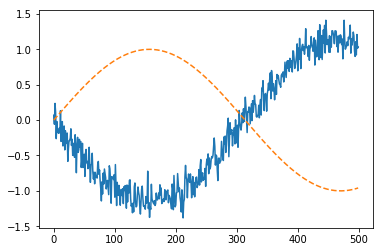

[-43.44990156]
0.6133676494738726


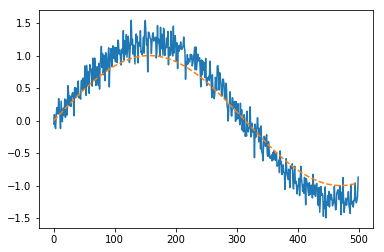

[-20.88046049]
0.4045834360658292


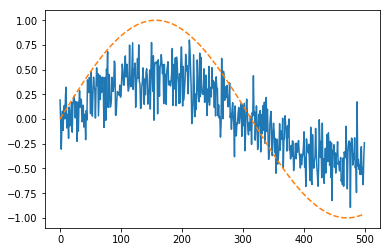

[-53.48798527]
0.4249855616861409


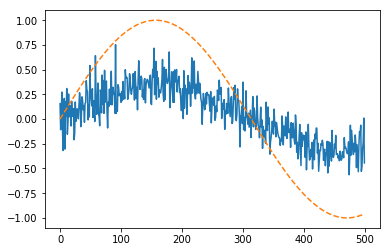

[-45.54332718]
0.4008845490520781


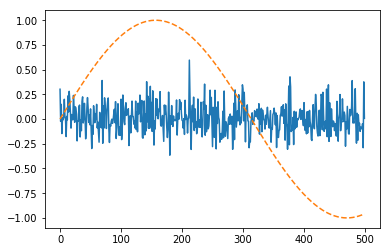

[-46.29955192]
0.42234364086266835


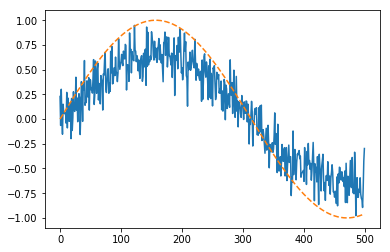

[-38.82569192]
0.5053927075874399


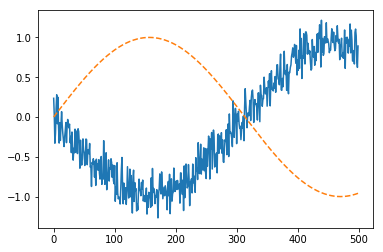

[-28.46601335]
0.4412242326337025


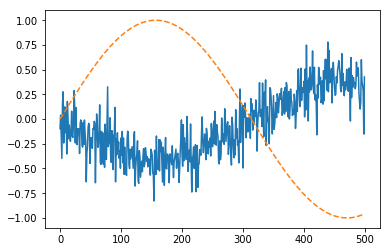

[-52.24825797]
0.30620041304278034


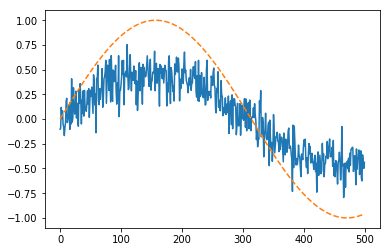

[-25.97382588]
0.4472249112851655


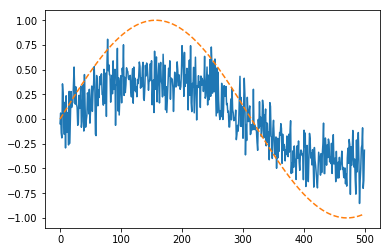

[-65.8007171]
0.43558887951351444


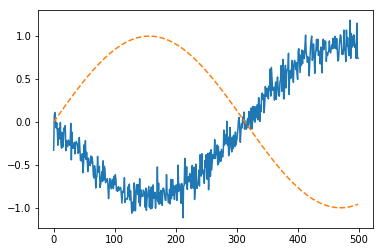

[-41.38842851]
0.8959651906977684


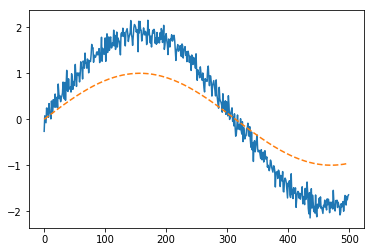

[-46.17722648]
0.6073770007172122


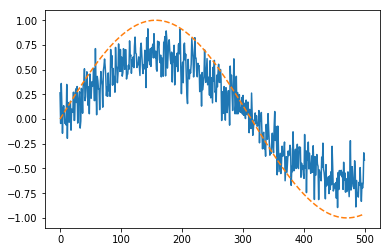

[-22.28673899]
1.1818690744457678


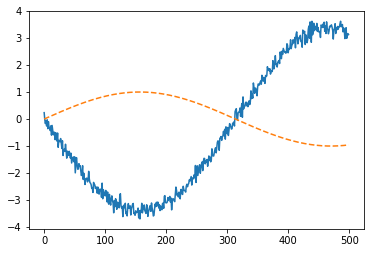

[-58.99867092]
0.37449138136559507


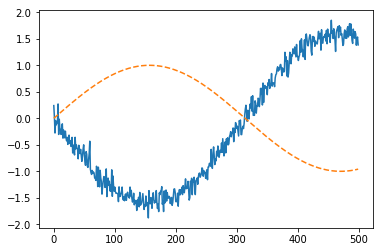

[-20.3563752]
0.42237535437057866


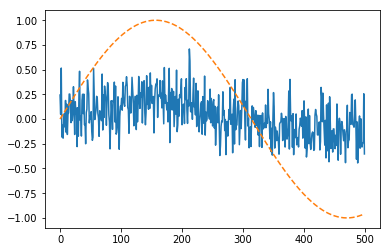

[-59.76266673]
0.6740511830724984


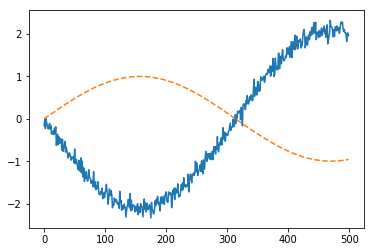

[-51.40214247]
0.6134003045148227


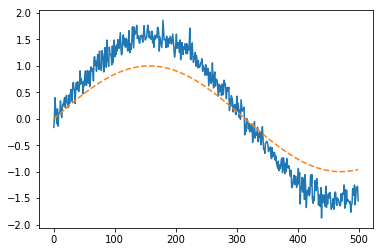

[-15.90372371]
0.26897043172265034


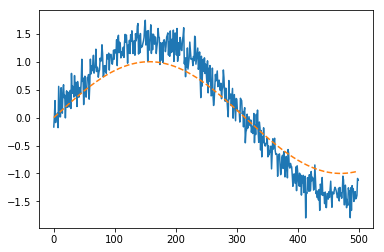

[-62.48609795]
0.4016347544201218


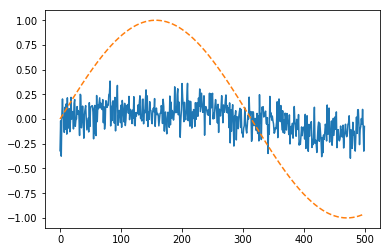

[-32.59381687]
0.4117693627875713


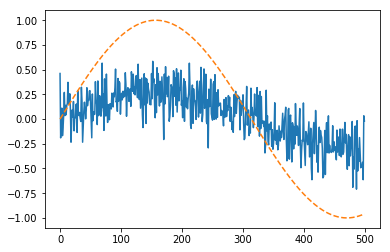

[-25.97682639]
0.6845995201054702


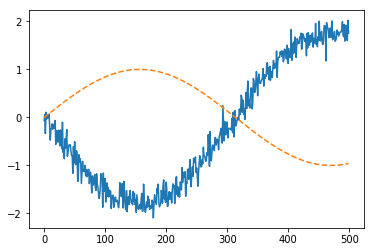

[-43.94592777]
0.4248242614741763


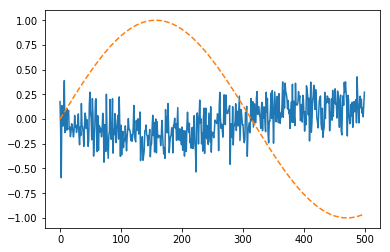

[-39.74119436]
0.37344078486114


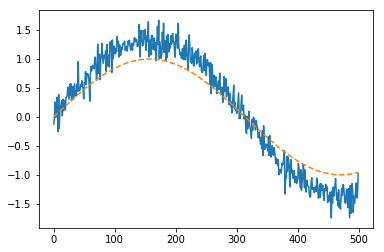

[-62.23818783]
0.4161929797555347


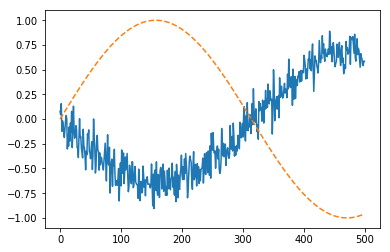

[-20.93855892]
0.40365665795792727


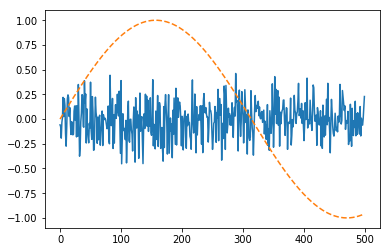

[-53.26492164]
0.410085626971721


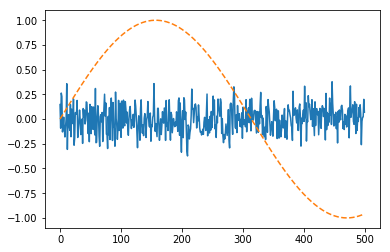

[-29.37687114]
0.6102796006392911


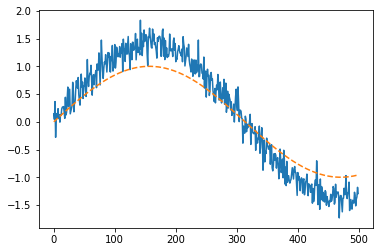

[-49.05450934]
0.4468883534368876


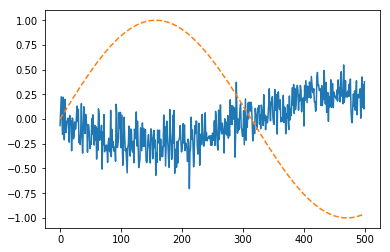

[-47.7386363]
0.4056490792848286


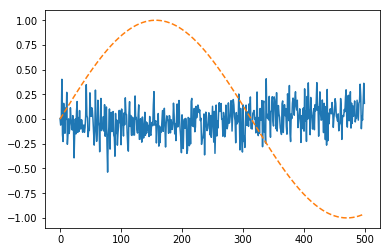

[-61.97579505]
0.41832216979368403


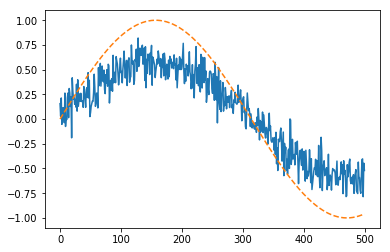

[-60.67968106]
1.083570374441609


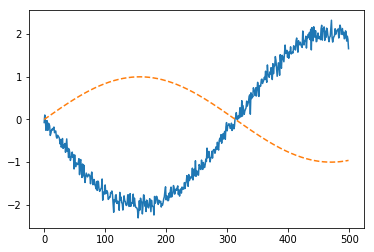

[-63.24448853]
0.3162741483457551


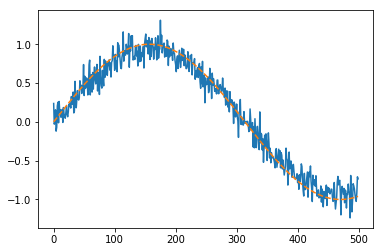

[-33.06465384]
0.6131691056780392


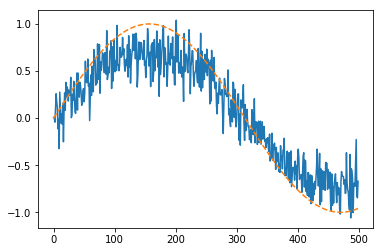

[-19.57468142]
1.6616103476216122


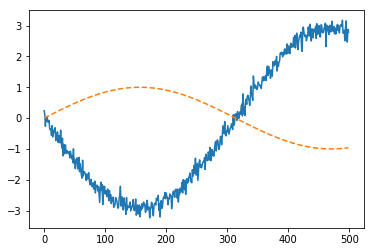

[-43.04528897]
0.43329300226118095


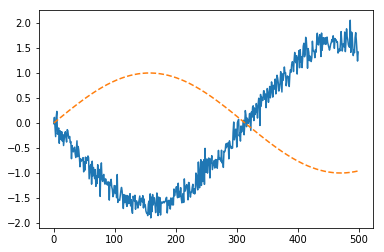

[-68.31519816]
0.49383796541921554


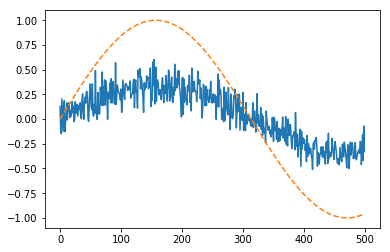

[-35.20827782]
0.7362277507710812


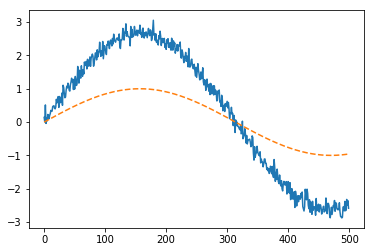

[-44.01347992]
0.6107746091171723


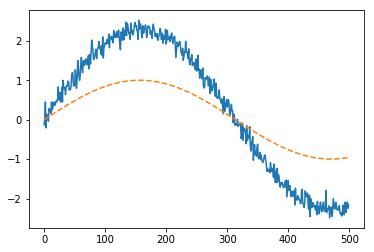

[-43.87451486]
0.415221462545426


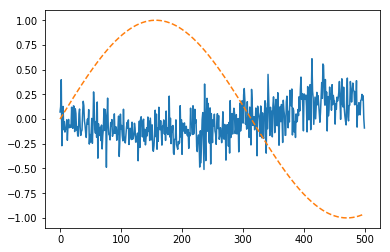

[-37.51816839]
0.42652787006750276


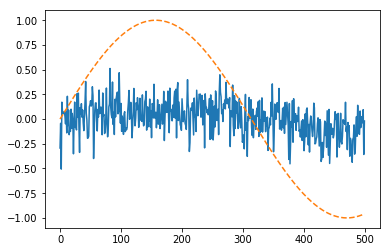

[-53.23576912]
1.0190456757197466


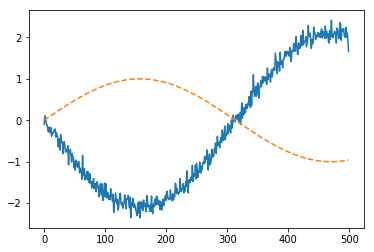

[-51.25642499]
0.4211594891990321


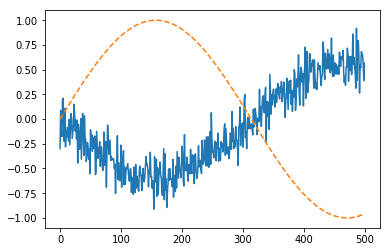

[-32.48200493]
0.5452324094167849


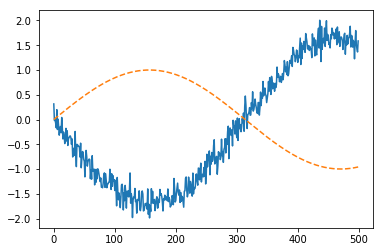

[-27.4187258]
0.39328497263872936


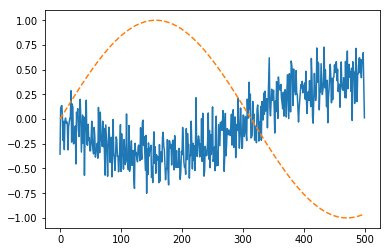

[-36.72680909]
0.3894877913034418


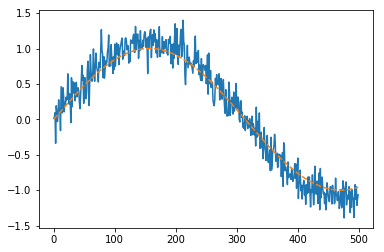

[-47.15372304]
0.5370210873332527


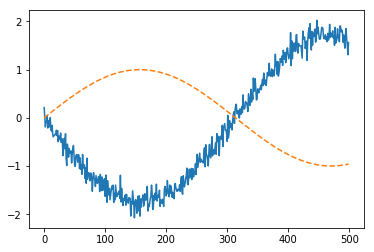

[-49.4677987]
0.40075353105118433


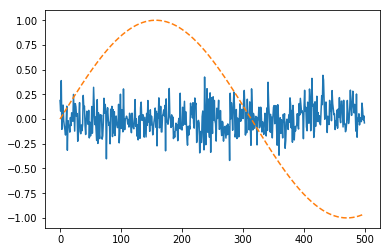

[-76.82711545]
0.44799219435773086


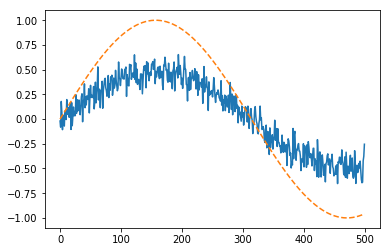

[-48.87894321]
0.405123801636695


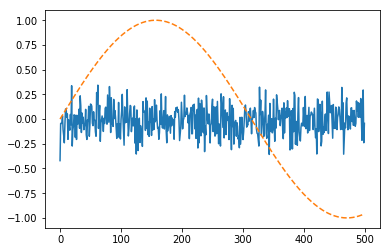

[-59.87727558]
0.3954430578517447


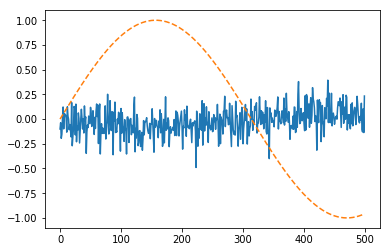

[-50.29351382]
0.3741873749155508


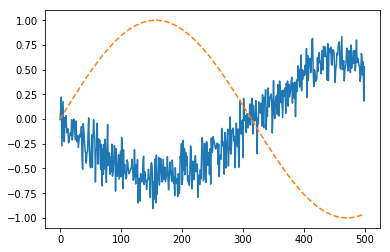

[-68.84284861]
0.4025915865347044


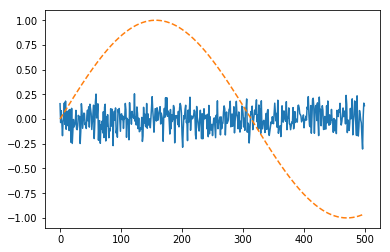

[-31.15458906]
0.314748895055062


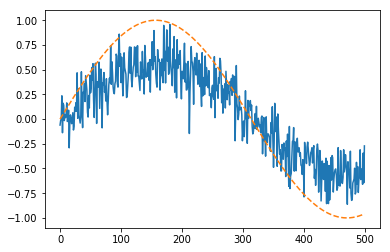

In [31]:
with tf.Session() as sess:
    for i in range(100):
        sess.run(tf.global_variables_initializer())
        p = sess.run(log_prob, feed_dict=feed_dict)  # works fine
        print(-p)
        l = sess.run(loss, feed_dict=feed_dict)
        print(l)
        yhat = sess.run(pred_mu, feed_dict=feed_dict)
        retval = sess.run(gradients, feed_dict=feed_dict)  # throws
        #print(retval)
        _, c = sess.run([optimizer, loss - log_prob], feed_dict=feed_dict)
        plt.plot(yhat[0, :])
        plt.plot(latent[:, 0], '--')
        plt.show()

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

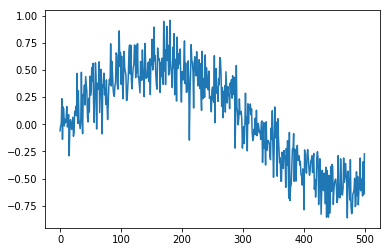

In [35]:
plt.plot(yhat[0, :])
plt.show()

In [39]:
kernel = RBF(length_scale=100.0, length_scale_bounds='fixed') 
model = GaussianProcessRegressor(kernel=kernel).fit(x.reshape((500, 1)), yhat[0, :])
posterior_mean = model.predict(x.reshape((500, 1)))

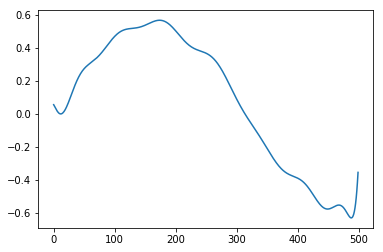

In [40]:
plt.plot(posterior_mean)
plt.show()